<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/desarrollo/02_EcuacionesNoLineales/Biseccion_interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'Numerico2021' already exists and is not an empty directory.


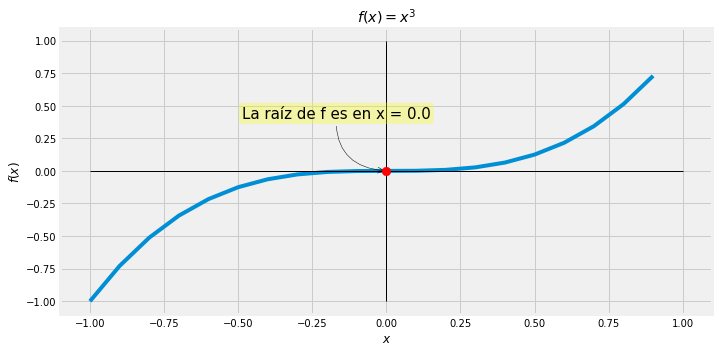

In [2]:
!git clone https://github.com/jugernaut/Numerico2021.git
import os
import numpy as np
import matplotlib.pyplot as plt
import Numerico2021.Utils.gutils as vis
%matplotlib inline

'''Esta funcion implementa el metodo de la biseccion
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
a:   limite inferior del rango inicial
b:   limite superior del rango inicial
'''
def biseccion(f,Tol,N,a,b):
    fa=f(a)
    fb=f(b)
    #no hay un cambio de signo (teorema del valor medio)
    #no existe raiz en el intervalo [a,b]
    if fa*fb>0:
        print ("no hay raiz en [a,b]")
        return
    #contador de iteraciones    
    n=1
    #mientras no se exceda el numero de iteraciones
    while n<=N:
        #se busca la raiz en el punto medio
        x0=(a+b)/2.0
        fx=f(x0)
        #se evalua el criterio de tolerancia
        if (abs(fx)<=Tol):
            return x0
        #en caso de no cumplir el criterio de tolerancia
        #se actualiza el rango de busqueda
        if (fa*fx <0.0):
            b=x0   
        if (fx*fa >0.0):      
           a=x0
        #el siguiente valor a evaluar es el punto medio  
        x1= (a+b)/2.0
        #en caso de que la iteracion siguiente y la diferencia
        #entre la iteracion anterior no excedan Tol, entonces
        #la iteracion actual se aproxima a la solucion buscada
        if abs( f(x1)) <= Tol and abs((x1-x0)/x1) <= Tol:
            return x1
        #se incrementa el contador de iteraciones
        n=n+1

def f(x):
  return x**3

x4 = np.arange(-1, 1, 0.1)
y4 = [f(i) for i in x4]
raiz = biseccion(f,0.001,1000,-1,1)

par = [{'title':'$f(x) = x^3$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]
graf = vis.planoCartesiano(par=par)
#funcion a grficar
graf.plot(x=x4,y=y4)
#ejes
graf.plot(x = [-1, 1], y = [0, 0], par={'ls':'-', 'lw':1, 'color':'black'})
graf.plot(x = [0, 0], y = [-1, 1], par={'ls':'-', 'lw':1, 'color':'black'})

graf.scatter(x=[raiz],y=[0.],par={'c':'red','marker':'o','s':75, 'zorder':5})
graf.annotate(par={'s':'La raíz de f es en x = '+str(raiz), 'xy':(raiz, 0), 'xytext':(-50,50), 'fontsize':15,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.3},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'black'}})

graf.show()